In [2]:
import warnings
warnings.filterwarnings("ignore")

from keras import models, layers
from keras import applications

In [3]:
vgg19 = applications.VGG19()

574717952/574710816 [==============================] - 401s 1us/step


In [4]:
vgg19

In [5]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [6]:
#reatio of input size and flattend size
224 * 224 * 3 / 25088

6.0

In [48]:
vgg19 = applications.VGG19(include_top = False, input_shape= (224,224,3)) # does not include the dense layers AT THE END!!!!

In [49]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import glob2 as glob
import random

glob_search_path = "cats_vs_dogs_small/train/**/*.jpg"
paths = glob.glob(glob_search_path)
print(len(paths))
path = random.choice(paths)
print(path)
#print("\n".join(paths))


2000
cats_vs_dogs_small/train\cats\cat.408.jpg


<class 'numpy.ndarray'> (224, 224, 3)


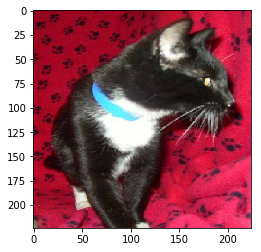

In [41]:
from PIL import Image

pic = Image.open(path) #bad shape
pic = pic.resize((224,224))
pic = np.array(pic) 
print(type(pic), pic.shape) 

plt.imshow(pic)
plt.show()
plt.close()

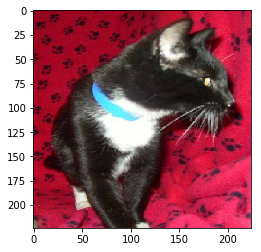

Orig Shape: (1, 7, 7, 512)
Flattened Shape: (25088,)


In [54]:
import matplotlib.image as img



plt.imshow(pic, cmap='gray')
plt.show()
plt.close()


latent_vec = vgg19.predict(pic.reshape(1,224,224,3)) #(None, 224, 224, 3) - first number is the amount of samples

print("Orig Shape:",latent_vec.shape)
print("Flattened Shape:",latent_vec.flatten().shape)